<a href="https://colab.research.google.com/github/lilasu086/UnsupervisedMachineLearning_MovieRecommendation/blob/main/BA820_TeamProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading

In [ ]:
# Import necessary packages
import pandas as pd
import seaborn as sns
import missingno as msno
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read the dataset
df = pd.read_csv("/content/TMDB_movie_dataset_v11.csv")

In [ ]:
# Examine the dataset
df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


## Data Preprocessing


###1.Check Missing Values

 We generated a missing value chart to provide a comprehensive overview of the data distribution, aiding us in identifying areas requiring attention.

<Axes: >

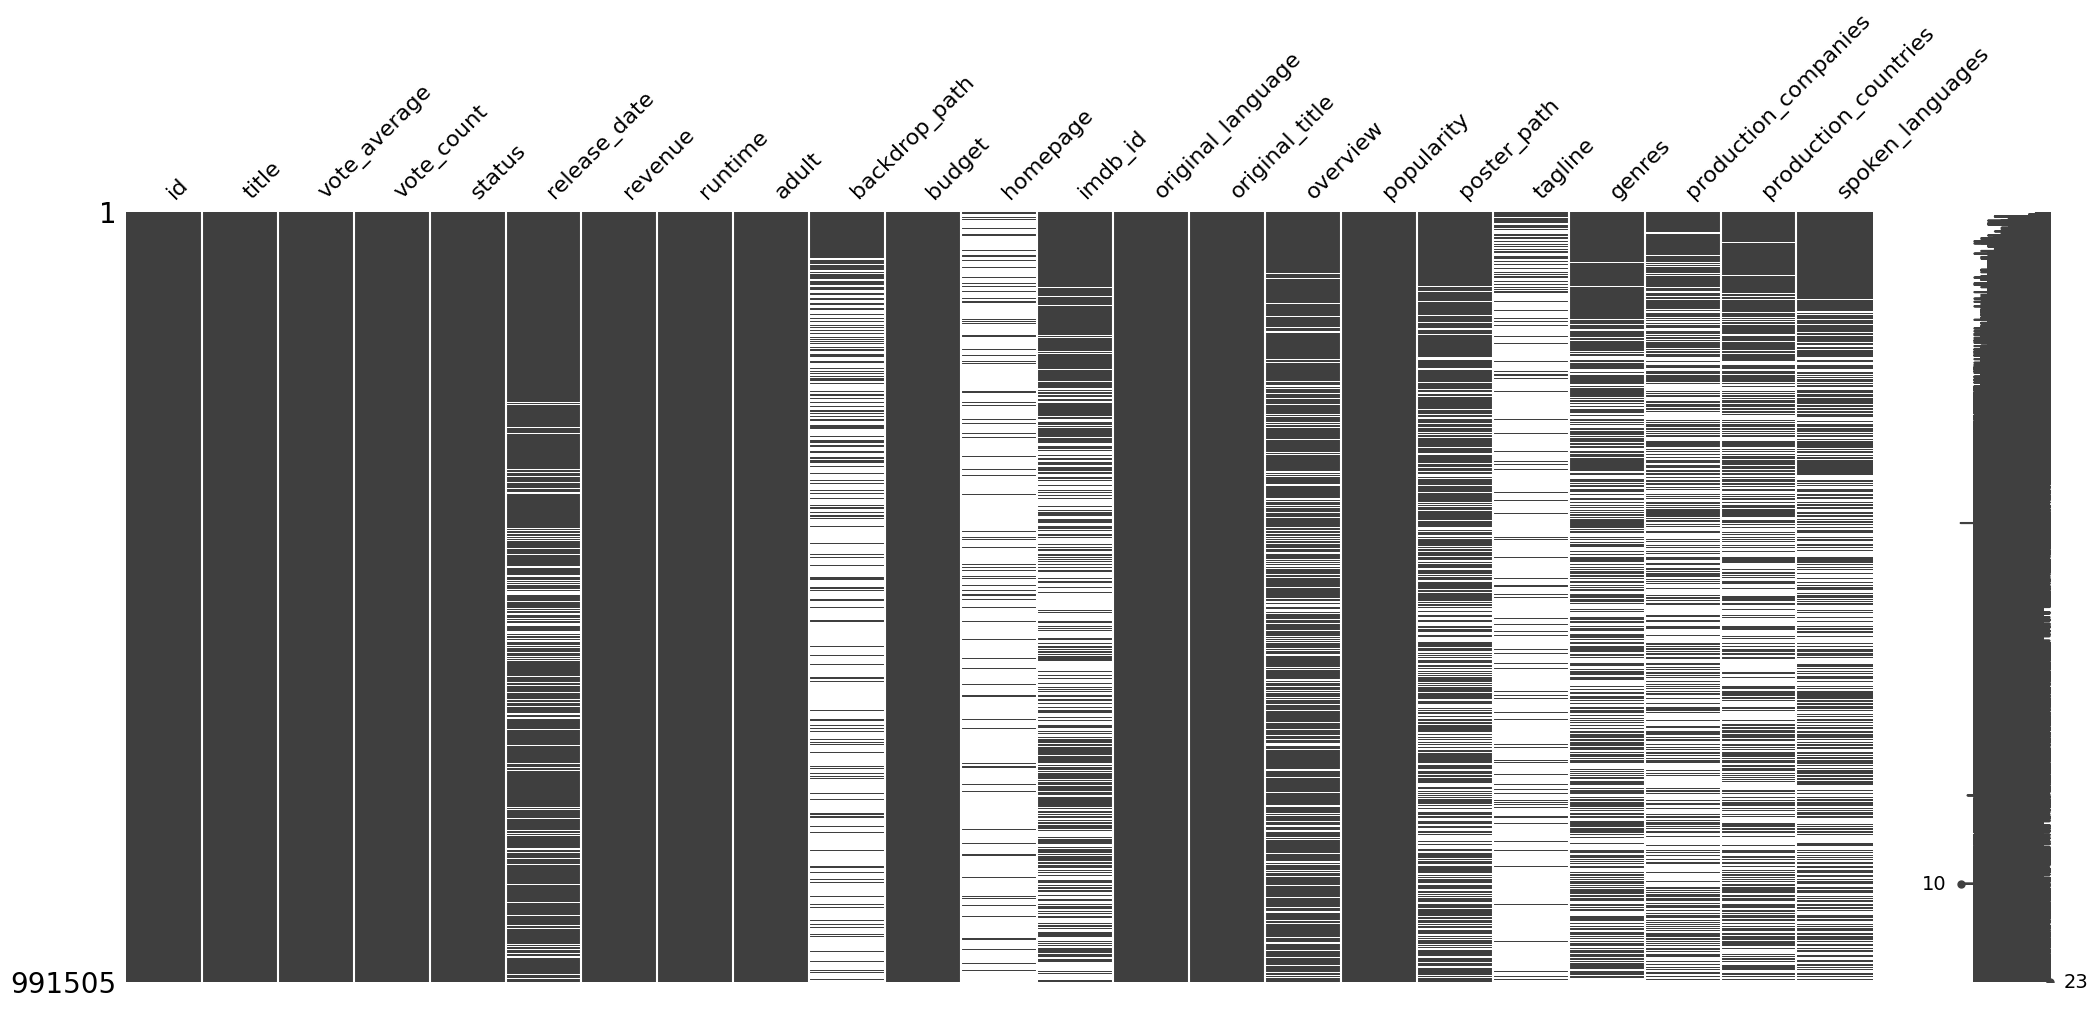

In [ ]:
# Plot a msno matrix to show NaN value distribution
msno.matrix(df)

In [ ]:
# Examine the dataset's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991505 entries, 0 to 991504
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    991505 non-null  int64  
 1   title                 991493 non-null  object 
 2   vote_average          991505 non-null  float64
 3   vote_count            991505 non-null  int64  
 4   status                991505 non-null  object 
 5   release_date          881511 non-null  object 
 6   revenue               991505 non-null  int64  
 7   runtime               991505 non-null  int64  
 8   adult                 991505 non-null  bool   
 9   backdrop_path         283001 non-null  object 
 10  budget                991505 non-null  int64  
 11  homepage              107518 non-null  object 
 12  imdb_id               569184 non-null  object 
 13  original_language     991505 non-null  object 
 14  original_title        991493 non-null  object 
 15  

In [ ]:
# Examine the dataset's statistic info
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,9.915050e+05,991505.000000,991505.000000,9.915050e+05,991505.000000,9.915050e+05,991505.000000
mean,6.562278e+05,2.120968,21.628466,7.500084e+05,50.802460,2.953519e+05,1.361716
std,3.515143e+05,3.116937,340.938660,1.813656e+07,62.308547,5.161645e+06,8.113785
min,2.000000e+00,0.000000,0.000000,-1.200000e+01,-28.000000,0.000000e+00,0.000000
25%,3.673360e+05,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.600000
50%,6.577670e+05,0.000000,0.000000,0.000000e+00,30.000000,0.000000e+00,0.600000
75%,9.624260e+05,5.000000,1.000000,0.000000e+00,90.000000,0.000000e+00,0.920000
max,1.243324e+06,10.000000,34495.000000,3.000000e+09,14400.000000,9.000000e+08,2994.357000


###2.Drop Unused Columns

We systematically pruned the dataset by removing redundant columns and those plagued by substantial missing values, defined as exceeding 50%. These excised columns included 'id', 'backdrop_path', 'homepage', 'imdb_id', 'poster_path', 'original_title', 'tagline', 'production_companies', 'revenue', 'budget', and 'spoken_languages', thereby streamlining the dataset for enhanced clarity and efficiency.

In [ ]:
# Drop unused columns - these columns won't be used in clustering or NLP
df = df.drop(['id', 'revenue', 'backdrop_path', 'budget', 'homepage', 'imdb_id', 'poster_path', 'original_title', 'tagline', 'production_companies', 'spoken_languages'], axis=1)

###3.Drop Null Values

To protect data integrity, any rows containing null values ​​are also excluded from consideration.

In [ ]:
# Drop NaN values
df = df.dropna()

###4.Split 'Date' Column

After preliminary refinement, we extract time information from the "release_date" field.

In [ ]:
# Extract year and month from 'release_date' to create new columns, and drop the original 'release_date'
df['year']=df['release_date'].str[:4]
df['month']=df['release_date'].str[5:7]
df.drop('release_date', axis=1, inplace=True)

###5.Set Year Period

We are interested in films released from 2014 to 2023, covering a ten-year time frame. By narrowing the scope to this time period, we aimed to capture a contemporary and relevant subset of films for analysis.

In [ ]:
# Filter out movies that lie between 2014 and 2023
df['year'] = df['year'].astype(int)
df = df[(df['year']<2024) & (df['year']>2013)]

###6.Filter Data

We used filtering to ensure that only released films were included. Additionally, limiting our dataset to "English” language films. We also excluded movies with zero votes, as popularity and public acceptance are important factors in determining the suitability of recommendations. Moreover, since negative runtime values are nonsensical, we exclude movies with negative or zero runtime durations.

In [ ]:
# Filter movies that are released, original language are english, vote count larger than zero and runtime longer than zero
# Drop the original 'index' column since we filtered
df = df[(df['status']=='Released') & (df['original_language']=='en') & (df['vote_count']!=0) & (df['runtime']>0)].reset_index()
df = df.drop('index',axis=1)

In [ ]:
# Examine the preprocessed dataset
df.head()

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,production_countries,year,month
0,Interstellar,8.417,32571,Released,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",2014,11
1,Deadpool,7.606,28894,Released,108,False,en,The origin story of former Special Forces oper...,72.735,"Action, Adventure, Comedy",United States of America,2016,02
2,Avengers: Infinity War,8.255,27713,Released,149,False,en,As the Avengers and their allies have continue...,154.340,"Adventure, Action, Science Fiction",United States of America,2018,04
3,Guardians of the Galaxy,7.906,26638,Released,121,False,en,"Light years from Earth, 26 years after being a...",33.255,"Action, Science Fiction, Adventure",United States of America,2014,07
4,Avengers: Endgame,8.263,23857,Released,181,False,en,After the devastating events of Avengers: Infi...,91.756,"Adventure, Science Fiction, Action",United States of America,2019,04


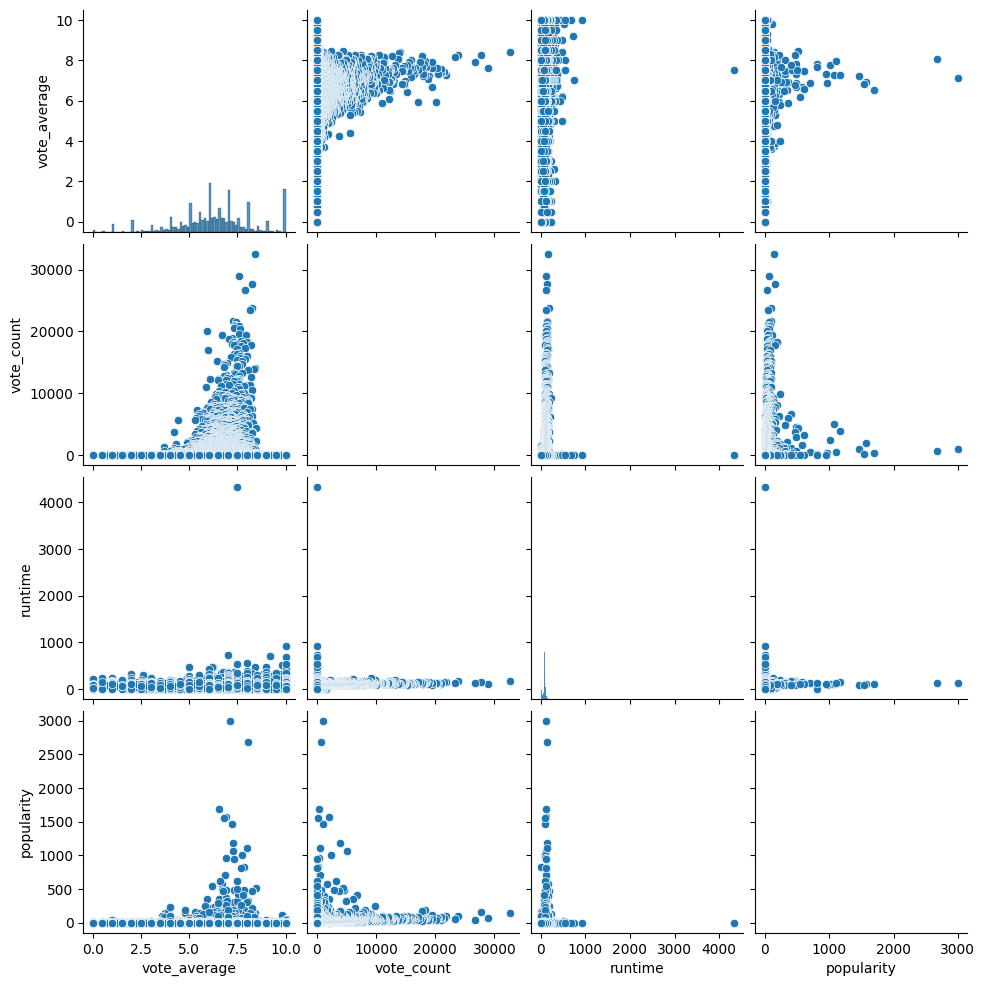

In [ ]:
# Plot a pairplot for numeric columns
sns.pairplot(df[['vote_average', 'vote_count', 'runtime', 'popularity']])

###7.Add 'Continent' Column

To enrich our data set with geographic insights, we converted the "Country of Production" information into the more informative "Continent" field.

In [ ]:
# Define a function to map country to its continent
def get_continent(countries):
    continents = {
        'Asia': {'Afghanistan', 'Armenia', 'Bahrain', 'Bangladesh', 'Cambodia', 'China', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyz Republic', "Lao People's Democratic Republic", 'Lebanon', 'Macao', 'Macau', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestinian Territory', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'},
        'Africa': {'Algeria', 'Botswana', 'Cameroon', 'Chad', 'Congo', 'Egypt', 'Eritrea', 'Ethiopia', 'Ghana', 'Guinea-Bissau', 'Kenya', 'Liberia', 'Madagascar', 'Mali', 'Mauritius', 'Morocco', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Seychelles', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'},
        'North America': {'Bahamas', 'Barbados', 'Bermuda', 'Canada', 'Costa Rica', 'Dominican Republic', 'Guatemala', 'Honduras', 'Jamaica', 'Martinique', 'Mexico', 'Puerto Rico', 'St. Kitts and Nevis', 'United States of America'},
        'Oceania' : {'American Samoa', 'Cook Islands', 'French Polynesia', 'Northern Mariana Islands'},
        'South America': {'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica, Nicaragua', 'El Salvador', 'Cuba', 'Ecuador', 'Panama', 'Peru', 'Trinidad and Tobago', 'Uruguay', 'Venezuela'},
        'Antarctica': {'South Georgia and the South Sandwich Islands'},
        'Europe': {'Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Netherlands', 'Northern Ireland', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'},
        'Australia': {'Australia', 'Christmas Island', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tokelau', 'Tonga', 'Tuvalu', 'Vanuatu'}
    }
    continent_set = set()
    # Use for loop to replace country with correct continent
    for country in countries:
        for continent, countries_set in continents.items():
            if country in countries_set:
                continent_set.add(continent)
    return ', '.join(continent_set)

# Create 'continent' column to replace 'production_countries', then drop the original 'production_countries' column
df['continent'] = df.loc[:,'production_countries'].apply(lambda x: get_continent(x.split(', ')))
df = df.drop('production_countries',axis=1)

###8.Get Dummy Variables

In preparation for subsequent analyses, we transformed categorical variables such as 'genres' and 'continent' into dummy variables. This transformation resulted in 19 variables for genres and 7 variables for continents, providing granular insights into movie categorization and global distribution patterns.

In [ ]:
# Define a function to get dummy variables for categorical columns
def get_dummy(dataframe_name,column_name):
  # Split the column value into list and strip the blank spaces
  data_column = dataframe_name.loc[:,column_name]
  data = list(data_column.apply(lambda x: x.split(',')))
  data = [[item.strip() for item in sublist] for sublist in data]
  # Use TransactionEncoder to get dummy variables
  te = TransactionEncoder()
  te_data = te.fit(data).transform(data)
  df_encoded = pd.DataFrame(te_data, columns=te.columns_)
  return(df_encoded)

In [ ]:
# Get dummy variables for 'continent' column
df_continent = get_dummy(df,'continent')

In [ ]:
# Get dummy variables for 'genres' column
df_genres = get_dummy(df,'genres')

###9.Normalize Numeric Columns

For the other continuous variables, we standardized them to ensure uniform scaling across the dataset.

In [ ]:
# Identify numeric columns, cast the 'year' column to string since we don't need it
df['year'] = df['year'].astype(str)
df_normalized = df.copy()
numeric_cols = df_normalized.select_dtypes(include=['number']).columns

# Create StandardScaler model and normalize the data
scaler = StandardScaler()
df_normalized[numeric_cols] = scaler.fit_transform(df_normalized[numeric_cols])

###10.Get Final Dataset

As a culmination of these preprocessing steps, our final dataset included 33,688 rows for comprehensive analysis and insightful exploration.

In [ ]:
# Merge dummy genres and continents back to normalized df
df_normalized = df_normalized.merge(df_genres, how='outer',left_index=True,right_index=True)
df_normalized = df_normalized.merge(df_continent, how='outer',left_index=True,right_index=True)

In [ ]:
# Replace binary columns with True = 1 and False = 0
df_normalized = df_normalized.replace({True: 1, False: 0})
df_normalized.head()

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,...,Thriller,War,Western,Africa,Asia,Australia,Europe,North America,Oceania,South America
0,Interstellar,1.117684,29.447011,Released,1.983690,0,en,The adventures of a group of explorers who mak...,3.723133,"Adventure, Drama, Science Fiction",...,0,0,0,0,0,0,1,1,0,0
1,Deadpool,0.691243,26.103364,Released,0.714015,0,en,The origin story of former Special Forces oper...,1.855161,"Action, Adventure, Comedy",...,0,0,0,0,0,0,0,1,0,0
2,Avengers: Infinity War,1.032501,25.029432,Released,1.567403,0,en,As the Avengers and their allies have continue...,4.113269,"Adventure, Action, Science Fiction",...,0,0,0,0,0,0,0,1,0,0
3,Guardians of the Galaxy,0.848989,24.051891,Released,0.984601,0,en,"Light years from Earth, 26 years after being a...",0.762702,"Action, Science Fiction, Adventure",...,0,0,0,0,0,0,0,1,0,0
4,Avengers: Endgame,1.036707,21.523013,Released,2.233462,0,en,After the devastating events of Avengers: Infi...,2.381495,"Adventure, Science Fiction, Action",...,0,0,0,0,0,0,0,1,0,0


## Data Analysis

In [ ]:
# Examine the final dataset's info
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33688 entries, 0 to 33687
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              33688 non-null  object 
 1   vote_average       33688 non-null  float64
 2   vote_count         33688 non-null  float64
 3   status             33688 non-null  object 
 4   runtime            33688 non-null  float64
 5   adult              33688 non-null  int64  
 6   original_language  33688 non-null  object 
 7   overview           33688 non-null  object 
 8   popularity         33688 non-null  float64
 9   genres             33688 non-null  object 
 10  year               33688 non-null  object 
 11  month              33688 non-null  object 
 12  continent          33688 non-null  object 
 13  Action             33688 non-null  int64  
 14  Adventure          33688 non-null  int64  
 15  Animation          33688 non-null  int64  
 16  Comedy             336

In [ ]:
# Get the subset of numeric columns from df_normalized
numeric_cols = df_normalized.select_dtypes(include=['number']).columns
df_num = df_normalized[numeric_cols]
df_num.head()

,vote_average,vote_count,runtime,adult,popularity,Action,Adventure,Animation,Comedy,Crime,...,Thriller,War,Western,Africa,Asia,Australia,Europe,North America,Oceania,South America
0,1.117684,29.447011,1.983690,0,3.723133,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0.691243,26.103364,0.714015,0,1.855161,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1.032501,25.029432,1.567403,0,4.113269,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.848989,24.051891,0.984601,0,0.762702,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.036707,21.523013,2.233462,0,2.381495,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


###1.Principal Component Analysis

For our clustering analysis, we employed Principal Component Analysis (PCA) along with a scree plot to determine the optimal number of components that effectively capture the most variance in the dataset. This process helped in reducing the dimensionality of the data while retaining as much information as possible.

In [ ]:
# Create a PCA model and train the model with df_num
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_num)
transformed_data_df = pca.transform(df_num)

In [ ]:
# Examine the dataframe's shape
transformed_data_df.shape

(33688, 31)

In [ ]:
# Plot the cumulative explained variance ratio
import numpy as np
import plotly.express as px
cum_var_exp = np.cumsum(pca.explained_variance_ratio_*100)
px.line(cum_var_exp)

After conducting Principal Component Analysis (PCA), we created a scree plot to analyze the contribution to the proportional variance of each principal component. The cumulative explained variance ratio plot revealed that a minimum of 9 components is necessary to capture at least 85% of the variance, indicating the key dimensions for representing the dataset effectively. Consequently, we retained the results from PCA for our analysis.

In [ ]:
# Re-run the PCA model with 9 components
pca2 = PCA(n_components=9,random_state=42)
pca2.fit(df_num)
pca2 = pca2.transform(df_num)

In [ ]:
# Create a dataframe to show the PCA results
df_pca= pd.DataFrame(pca2,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,22.251886,-4.601009,-1.404194,-19.040593,1.736675,0.235165,-0.027645,-1.220582,0.533915
1,18.421905,-4.028086,-1.265664,-18.076196,0.714300,0.908770,0.764974,-0.592929,0.165886
2,19.472253,-4.127937,-1.823711,-15.702312,0.910204,0.992240,0.005045,-0.718994,0.211774
3,16.623154,-3.638873,-0.309527,-17.058632,0.777365,0.950089,-0.042745,-0.630446,0.135096
4,16.537279,-3.167232,-0.225129,-13.848234,0.744658,0.885235,-0.001676,-0.499699,0.190697
...,...,...,...,...,...,...,...,...,...
33683,-0.208335,-1.879797,0.832544,0.374297,1.054617,0.367186,0.042409,-0.016329,-0.068274
33684,0.073279,-1.074479,0.886345,0.402446,-0.461217,0.171105,-0.019924,0.129267,0.024784
33685,-0.593731,1.278573,-0.968557,-0.393105,0.034365,0.860932,-0.047340,-0.722725,0.015843
33686,-0.801472,-2.296938,-0.097669,-0.070263,0.487326,-1.124716,0.456180,0.271228,0.032888


###2.K-means Clustering

Additionally, we utilized k-means clustering to identify inherent patterns and groupings within the data. To determine the optimal number of clusters for k-means, we constructed an Elbow plot, which depicts the relationship between the number of clusters and the within-cluster sum of squares. This visualization aided in identifying the point of inflection, suggesting the optimal number of clusters for our dataset.


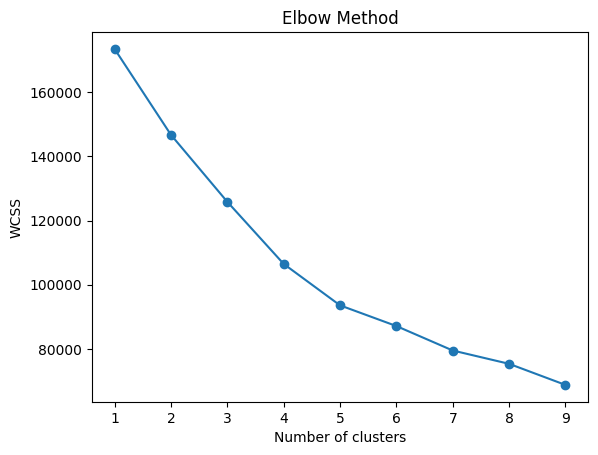

In [ ]:
# Use Elbow method to find the proper number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Select 5 as our cluster from the elbow method plot above, then run K-means model
num_clusters = 5
kmeans_result = KMeans(num_clusters,init='random',random_state=42).fit(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Specify each movie's cluster label
df['cluster_labels']=kmeans_result.labels_
df

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,year,month,continent,cluster_labels
0,Interstellar,8.417,32571,Released,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction",2014,11,"North America, Europe",3
1,Deadpool,7.606,28894,Released,108,False,en,The origin story of former Special Forces oper...,72.735,"Action, Adventure, Comedy",2016,02,North America,3
2,Avengers: Infinity War,8.255,27713,Released,149,False,en,As the Avengers and their allies have continue...,154.340,"Adventure, Action, Science Fiction",2018,04,North America,3
3,Guardians of the Galaxy,7.906,26638,Released,121,False,en,"Light years from Earth, 26 years after being a...",33.255,"Action, Science Fiction, Adventure",2014,07,North America,3
4,Avengers: Endgame,8.263,23857,Released,181,False,en,After the devastating events of Avengers: Infi...,91.756,"Adventure, Science Fiction, Action",2019,04,North America,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33683,Tom,10.000,1,Released,68,False,en,Tom Ballard lives with his father James in a c...,0.600,"Adventure, Documentary",2015,03,Europe,4
33684,PawParazzi,9.000,1,Released,90,False,en,"London Bridges, a fast rising Hollywood starle...",0.939,Family,2019,03,North America,4
33685,Lost Cities: The Great Flood,3.000,1,Released,45,False,en,"Albert Lin is on a global adventure, from icy ...",0.896,Documentary,2021,05,North America,1
33686,Kids in Brick Houses,10.000,1,Released,7,False,en,A case of home-squatting escalates into an unu...,0.600,"Comedy, Drama, Mystery",2015,05,Europe,0


In [ ]:
# Count the number of each cluster
df['cluster_labels'].value_counts()

2    12982
4     7448
0     7104
1     5796
3      358
Name: cluster_labels, dtype: int64

In [ ]:
# Check information of each cluster
for i in range(0,5):
  df_cluster = df[df['cluster_labels']==i]
  print(f'cluster{i}')
  display(df_cluster.describe())

cluster0


,vote_average,vote_count,runtime,popularity,cluster_labels
count,7104.000000,7104.000000,7104.000000,7104.000000,7104.0
mean,7.404566,10.809825,14.576999,1.406169,0.0
std,1.635816,63.557550,12.037940,4.115464,0.0
min,4.500000,1.000000,1.000000,0.000000,0.0
25%,6.000000,1.000000,6.000000,0.600000,0.0
50%,7.000000,1.000000,11.000000,0.619000,0.0
75%,8.741500,4.000000,18.000000,1.051500,0.0
max,10.000000,1737.000000,65.000000,153.721000,0.0


cluster1


,vote_average,vote_count,runtime,popularity,cluster_labels
count,5796.000000,5796.000000,5796.000000,5796.000000,5796.0
mean,3.438970,12.556936,70.208420,2.146610,1.0
std,1.286924,49.775944,32.775457,4.444504,0.0
min,0.000000,1.000000,1.000000,0.000000,1.0
25%,2.500000,1.000000,56.000000,0.675000,1.0
50%,4.000000,3.000000,82.000000,1.308000,1.0
75%,4.429000,8.000000,90.000000,2.327250,1.0
max,5.700000,1839.000000,235.000000,158.795000,1.0


cluster2


,vote_average,vote_count,runtime,popularity,cluster_labels
count,12982.000000,12982.000000,12982.00000,12982.000000,12982.0
mean,6.111515,227.751425,97.42012,8.187188,2.0
std,0.811634,606.591272,28.66928,16.576164,0.0
min,2.000000,1.000000,40.00000,0.000000,2.0
25%,5.500000,5.000000,85.00000,1.892000,2.0
50%,6.005000,21.000000,92.00000,3.811000,2.0
75%,6.694750,113.000000,103.00000,9.164000,2.0
max,10.000000,5122.000000,923.00000,359.237000,2.0


cluster3


,vote_average,vote_count,runtime,popularity,cluster_labels
count,358.000000,358.000000,358.000000,358.000000,358.0
mean,7.107232,8662.874302,133.298883,132.249036,3.0
std,0.666933,5165.542843,222.908223,308.552690,0.0
min,4.414000,6.000000,9.000000,1.038000,3.0
25%,6.679750,5611.750000,107.000000,32.461750,3.0
50%,7.171500,7324.500000,119.500000,47.579000,3.0
75%,7.593500,10929.500000,133.000000,79.379500,3.0
max,8.442000,32571.000000,4320.000000,2994.357000,3.0


cluster4


,vote_average,vote_count,runtime,popularity,cluster_labels
count,7448.000000,7448.000000,7448.000000,7448.000000,7448.0
mean,7.723737,17.784372,88.582035,2.106419,4.0
std,1.302221,77.109419,30.588867,3.535191,0.0
min,5.000000,1.000000,29.000000,0.000000,4.0
25%,6.800000,1.000000,71.000000,0.670000,4.0
50%,7.500000,3.000000,87.000000,1.232000,4.0
75%,8.500000,9.000000,99.000000,2.182000,4.0
max,10.000000,3084.000000,481.000000,111.252000,4.0


Additionally, employing k-means clustering on the dataset of 33,688 movies resulted in the segmentation of the data into 5 clusters. The distribution of movies across these clusters is as follows: 7,104 movies belong to Cluster Zero, 5,796 movies belong to Cluster One, 12,982 movies belong to Cluster Two, 358 movies belong to Cluster Three, and 7,448 movies belong to Cluster Four. This segmentation offers initial insights into the inherent structure and patterns within the dataset.

From the preliminary results, it's evident that Cluster Zero has the shortest average runtime, about 15 minutes, indicating that it is primarily composed of short videos. Cluster Three stands out with the highest vote count and popularity among all clusters, indicating it likely contains some highly acclaimed movies. Notably, Cluster One exhibits the lowest average vote rating, implying that movies in this cluster might not be highly recommended.

In [ ]:
# Short movie cluster
df[df['cluster_labels'] == 0].sort_values(by='vote_count', ascending=False).head()


,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,year,month,continent,cluster_labels
817,Frozen Fever,6.831,1737,Released,8,False,en,"On Anna's birthday, Elsa and Kristoff are dete...",20.049,"Animation, Family, Adventure, Comedy",2015,03,North America,0
827,Kung Fury,7.470,1719,Released,32,False,en,"During an unfortunate series of events, a frie...",11.144,"Action, Comedy, Science Fiction, Fantasy",2015,05,Europe,0
860,The Guardians of the Galaxy Holiday Special,7.225,1625,Released,45,False,en,On a mission to make Christmas unforgettable f...,46.523,"Comedy, Science Fiction, Adventure",2022,11,North America,0
899,Piper,8.164,1518,Released,6,False,en,A mother bird tries to teach her little one ho...,9.611,"Family, Animation",2016,06,North America,0
976,Olaf's Frozen Adventure,6.443,1358,Released,22,False,en,Olaf is on a mission to harness the best holid...,16.941,"Animation, Family, Adventure, Comedy, Fantasy",2017,10,North America,0


The first cluster exclusively comprises short movies with an average runtime of approximately 15 minutes, like cartoon films "Frozen Fever" and "Olaf’s Frozen Adventure."

In [ ]:
# Low-rated movie cluster
df[df['cluster_labels'] == 1].sort_values(by='vote_count', ascending=False).head(5)

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,year,month,continent,cluster_labels
781,Slender Man,4.333,1839,Released,93,False,en,"In a small town in Massachusetts, four high sc...",17.454,"Horror, Mystery, Thriller",2018,08,North America,1
1021,The Open House,3.703,1290,Released,94,False,en,A teenager and his mother find themselves besi...,7.853,"Horror, Thriller",2018,01,North America,1
1488,Wounds,4.026,730,Released,94,False,en,Disturbing and mysterious things begin to happ...,11.249,"Horror, Mystery, Thriller",2019,01,Europe,1
1534,The Human Centipede 3 (Final Sequence),3.700,697,Released,103,False,en,Taking inspiration from The Human Centipede fi...,23.658,"Horror, Comedy",2015,05,Europe,1
1571,Escape Room,4.468,662,Released,81,False,en,Six friends test their intelligence in a game ...,11.812,"Horror, Thriller",2017,09,North America,1


Movies in the second cluster show high popularity, featuring renowned titles such as "Interstellar" and "Deadpool."

In [ ]:
# High popularity movie cluster
df[df['cluster_labels'] == 3].sort_values(by='vote_count', ascending=False).head()

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,year,month,continent,cluster_labels
0,Interstellar,8.417,32571,Released,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction",2014,11,"North America, Europe",3
1,Deadpool,7.606,28894,Released,108,False,en,The origin story of former Special Forces oper...,72.735,"Action, Adventure, Comedy",2016,02,North America,3
2,Avengers: Infinity War,8.255,27713,Released,149,False,en,As the Avengers and their allies have continue...,154.340,"Adventure, Action, Science Fiction",2018,04,North America,3
3,Guardians of the Galaxy,7.906,26638,Released,121,False,en,"Light years from Earth, 26 years after being a...",33.255,"Action, Science Fiction, Adventure",2014,07,North America,3
4,Avengers: Endgame,8.263,23857,Released,181,False,en,After the devastating events of Avengers: Infi...,91.756,"Adventure, Science Fiction, Action",2019,04,North America,3


In contrast, the last cluster consists of movies with the lowest average vote ratings, indicating that films in this group may not be highly recommended, such as "The Human Centipede" and "Day of the Dead Bloodline."

In [ ]:
df_normalized['cluster_labels']=kmeans_result.labels_
df

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,year,month,continent,cluster_labels
0,Interstellar,8.417,32571,Released,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction",2014,11,"North America, Europe",3
1,Deadpool,7.606,28894,Released,108,False,en,The origin story of former Special Forces oper...,72.735,"Action, Adventure, Comedy",2016,02,North America,3
2,Avengers: Infinity War,8.255,27713,Released,149,False,en,As the Avengers and their allies have continue...,154.340,"Adventure, Action, Science Fiction",2018,04,North America,3
3,Guardians of the Galaxy,7.906,26638,Released,121,False,en,"Light years from Earth, 26 years after being a...",33.255,"Action, Science Fiction, Adventure",2014,07,North America,3
4,Avengers: Endgame,8.263,23857,Released,181,False,en,After the devastating events of Avengers: Infi...,91.756,"Adventure, Science Fiction, Action",2019,04,North America,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33683,Tom,10.000,1,Released,68,False,en,Tom Ballard lives with his father James in a c...,0.600,"Adventure, Documentary",2015,03,Europe,4
33684,PawParazzi,9.000,1,Released,90,False,en,"London Bridges, a fast rising Hollywood starle...",0.939,Family,2019,03,North America,4
33685,Lost Cities: The Great Flood,3.000,1,Released,45,False,en,"Albert Lin is on a global adventure, from icy ...",0.896,Documentary,2021,05,North America,1
33686,Kids in Brick Houses,10.000,1,Released,7,False,en,A case of home-squatting escalates into an unu...,0.600,"Comedy, Drama, Mystery",2015,05,Europe,0


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_normalized, x='runtime', y='vote_average', z='popularity', color = 'cluster_labels')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

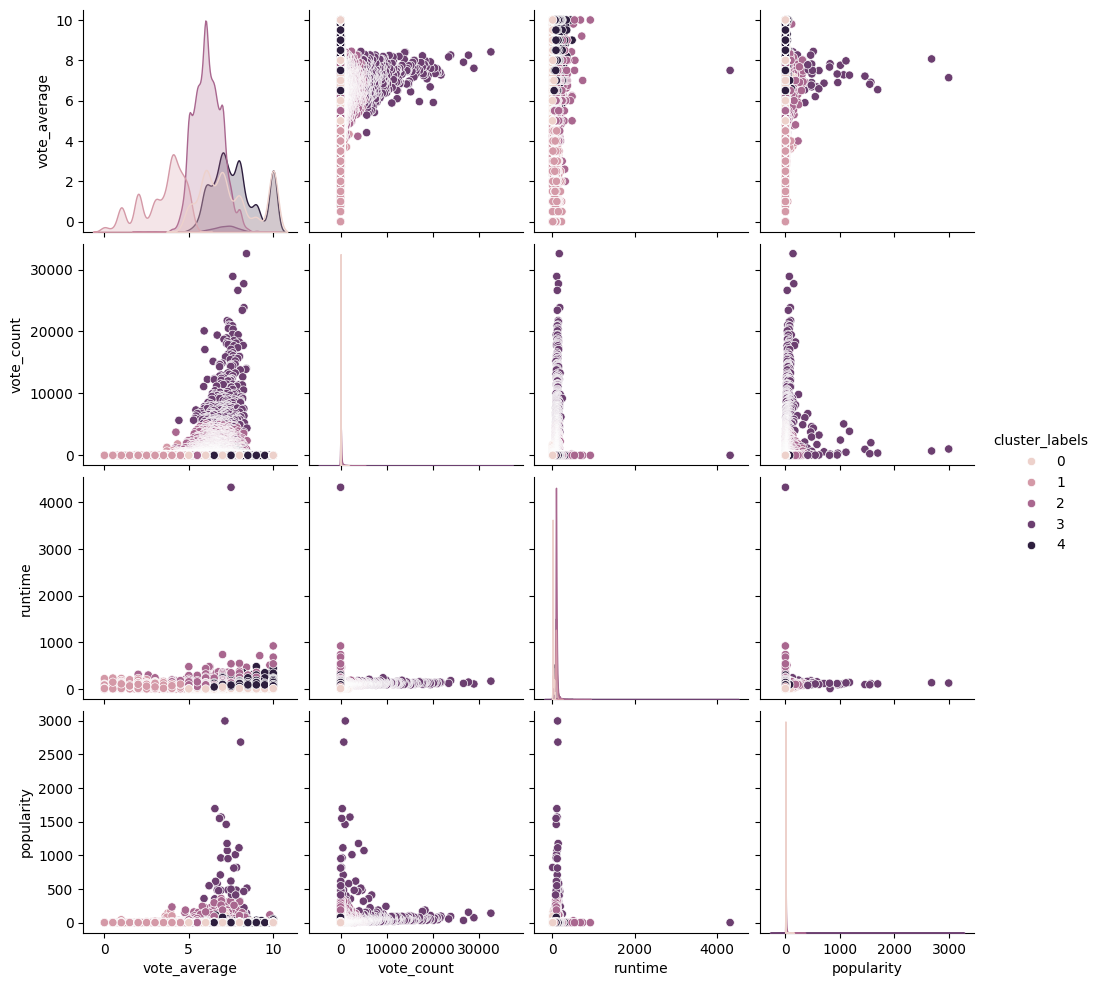

In [ ]:
# Plot a pairplot for numeric columns with cluster labels as hue
sns.pairplot(df[['vote_average', 'vote_count', 'runtime', 'popularity', 'cluster_labels']], hue='cluster_labels')

## NLP Analyis

For our NLP analysis, we used the "overview" column of our dataset. We utilized various techniques such as n-gram analysis, TF-IDF (Term Frequency-Inverse Document Frequency), word2vec, and GloVe (Global Vectors for Word Representation). By comparing the results obtained from these techniques, we continued to iterate and improve upon our NLP techniques to enhance the accuracy and relevance of our movie recommendations. Our goal is to fine-tune our algorithms and explore additional tokenization approaches to deliver even more precise and tailored suggestions to users, ensuring a more satisfying and personalized movie-watching experience.

###1.NLP preprocessing

In [ ]:
# Perform 'overview' text preprocessing: remove '\n' , convert to lower case and remove all non-alpha-numeric characters
df.overview = df.overview.str.strip()
df.overview = df.overview.str.lower()
df.overview = df.overview.str.replace('[^A-Za-z0-9\s]+','')

<ipython-input-56-f7172f1aa23e>:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
# Import necessary packages
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Build tokenization models and indicate stopwords list
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Define the preprocessing function
def process_text(text):
  tokens = word_tokenize(text)
  tokens_remove_stop = [word for word in tokens if word not in stop_words]
# result = [stemmer.stem(word) for word in tokens_remove_stop]
  result = [lemmatizer.lemmatize(word) for word in tokens_remove_stop]
  return result

###2.1 N-gram

In [ ]:
# Import necessary packages
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Build the N-gram model
from sklearn.feature_extraction.text import CountVectorizer

ngram = CountVectorizer(tokenizer=process_text,ngram_range=(1,4))
ngram_transformed = ngram.fit_transform(df.overview)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
# Examine the N-gram result's shape
ngram_transformed.shape

(33688, 2251857)

In [ ]:
# Define the movie_recommendation_ngram function
def movie_recommendation_ngram(movie_id):
  movie_vector = ngram.transform([df.overview.iloc[movie_id]])
  cos_sim = pd.DataFrame(cosine_similarity(movie_vector, ngram_transformed))
  top_five = cos_sim.sort_values(by=0,axis=1,ascending = False).iloc[:,0:6]
  top_five_id = list(top_five.columns)
  top_five_rows = df.iloc[top_five_id]
  top_five_scores = top_five.values.flatten().tolist()
  top_five_rows['Cosine Similarity Score'] = top_five_scores
  top_five_rows = top_five_rows[['title','overview','genres','Cosine Similarity Score','cluster_labels']]
  return movie_id, top_five_rows

###2.2 TF-IDF

In [ ]:
# Build the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(tokenizer=process_text, norm=None)
tfidf_model.fit(df.overview)
tfidf_transformed = tfidf_model.transform(df.overview)

In [ ]:
# Examine the TF-IDF result's shape
tfidf_transformed.shape

(33688, 54688)

In [ ]:
# Define the movie_recommendation_tfidf function
def movie_recommendation_tfidf(movie_id):
  movie_vector = tfidf_model.transform([df.overview.iloc[movie_id]])
  cos_sim = pd.DataFrame(cosine_similarity(movie_vector, tfidf_transformed))
  top_five = cos_sim.sort_values(by=0,axis=1,ascending = False).iloc[:,0:6]
  top_five_id = list(top_five.columns)
  top_five_rows = df.iloc[top_five_id]
  top_five_scores = top_five.values.flatten().tolist()
  top_five_rows['Cosine Similarity Score'] = top_five_scores
  top_five_rows = top_five_rows[['title','overview','genres','Cosine Similarity Score','cluster_labels']]
  return movie_id, top_five_rows

###2.3 Word2Vec

Additionally, we did parameter tuning in the Word2Vec model to optimize our model. We tried adjusting the vector_size parameter, exploring values ​​of 100 and 300 to fine-tune the dimensionality of single-word embeddings and capture more semantic relationships. In addition, we also changed the number of windows from 3 to 5 to expand the context window of word embeddings to capture broader contextual information. In addition, we also try to set sg=1, which enables the Skip-gram model in Word2Vec to focus on predicting the context words of a given target word to enhance the model's ability to capture complex single-word associations. In the end, we chose the final parameters based on computational time and the results, then compared the results with other NLP models.

In [ ]:
# Build the Word2Vec model
from gensim.models import Word2Vec

word2vec_tokenized = [process_text(sentence) for sentence in df.overview]

model_word2vec = Word2Vec(sentences=word2vec_tokenized, vector_size=300, window=5, min_count=1, workers=4, epochs=50)
model_word2vec = model_word2vec.wv

In [ ]:
#model_word2vec = Word2Vec(sentences=word2vec_tokenized, vector_size=100, window=5, min_count=1, workers=4, epochs=50)
#model_word2vec = model_word2vec.wv

In [ ]:
#model_word2vec = Word2Vec(sentences=word2vec_tokenized, vector_size=300, window=3, min_count=1, workers=4, epochs=50)
#model_word2vec = model_word2vec.wv

In [ ]:
#model_word2vec = Word2Vec(sentences=word2vec_tokenized, vector_size=300, window=3, min_count=1, workers=4, epochs=50,sg=1)
#model_word2vec = model_word2vec.wv

In [ ]:
# Define the word embedding function
def get_word_embedding(word, model):
    if word in model.key_to_index:
        return model[word]
    else:
        return np.zeros(model.vector_size)

In [ ]:
# Get the mean embeddings for each overview
embeddings = []
for tokenized_document in word2vec_tokenized:
  message_word_embeddings = [get_word_embedding(word, model_word2vec) for word in tokenized_document ]
  message_embedding = np.mean(message_word_embeddings if len(message_word_embeddings) >0 else [np.zeros(model_word2vec.vector_size)], axis=0)
  embeddings = embeddings + [message_embedding]

embeddings = np.array(embeddings)

In [ ]:
# Examine the word2vec result's shape
embeddings.shape

(33688, 300)

In [ ]:
# Define the movie_recommendation_word2vec function
def movie_recommendation_word2vec(movie_id,embeddings):
  movie_embedding = embeddings[movie_id].reshape(1, -1)
  cos_sim = pd.DataFrame(cosine_similarity(movie_embedding, embeddings))
  top_five = cos_sim.sort_values(by=0,axis=1,ascending = False).iloc[:,0:6]
  top_five_id = list(top_five.columns)
  top_five_rows = df.iloc[top_five_id]
  top_five_scores = top_five.values.flatten().tolist()
  top_five_rows['Cosine Similarity Score'] = top_five_scores
  top_five_rows = top_five_rows[['title','overview','genres','Cosine Similarity Score','cluster_labels']]
  return movie_id, top_five_rows

###2.4 Glove

In [ ]:
# Import necessary package and build model
from gensim import downloader

glove_model = downloader.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
# Tokenize the overviews with process_text function
glove_tokenized = [process_text(sentence) for sentence in df.overview]

In [ ]:
# Tokenize with another way - perform worse
#import spacy
#nlp = spacy.load("en_core_web_sm")

#def get_tokens(doc):
#    doc_tokenized = nlp(doc)
#    tokens = [token.text for token in doc_tokenized]
#    return tokens

In [ ]:
# Get the mean embeddings for each overview
embeddings_glove = []

for tokenized_document in glove_tokenized:
  message_word_embeddings = [get_word_embedding(word, glove_model) for word in tokenized_document ]
  message_embedding = np.mean(message_word_embeddings if len(message_word_embeddings) >0 else [np.zeros(glove_model.vector_size)], axis=0)
  embeddings_glove = embeddings_glove + [message_embedding]

embeddings_glove = np.array(embeddings_glove)

In [ ]:
# Examine the Glove result's shape
embeddings_glove.shape

(33688, 50)

In [ ]:
# Define the movie_recommendation_glove function
def movie_recommendation_glove(movie_id,embeddings):
  movie_embedding = embeddings_glove[movie_id].reshape(1, -1)
  cos_sim = pd.DataFrame(cosine_similarity(movie_embedding, embeddings_glove))
  top_five = cos_sim.sort_values(by=0,axis=1,ascending = False).iloc[:,0:6]
  top_five_id = list(top_five.columns)
  top_five_rows = df.iloc[top_five_id]
  top_five_scores = top_five.values.flatten().tolist()
  top_five_rows['Cosine Similarity Score'] = top_five_scores
  top_five_rows = top_five_rows[['title','overview','genres','Cosine Similarity Score','cluster_labels']]
  return movie_id, top_five_rows

## Model Performance ##

For the movie overviews, we utilized natural language processing (NLP) techniques to enhance the precision of movie recommendations for users. Specifically, we employed TF-IDF to determine which words are most important in each description. Additionally, we utilized Word2Vec to uncover connections between words, revealing hidden meanings within the overview text. Based on the results from these models, we provided recommendations for five movies that best match users' preferences and interests. We used "Avengers: Endgame" and "Dune" as examples. Notably, the top 5 recommended movies varied slightly between models. The detailed results are provided in the appendix. We also tested the model performance with genres by filtering romance movies and thriller movies to observe their cosine similarity in different models. Word2Vec performs better in this scenario. We expected to get relatively low scores since these two genres are very different, but the GloVe model gives us a high score, with the average above 0.85. Therefore, we consider this a poor performance that requires optimization or replacement.

In [ ]:
# Test the movie_id = 4 (Avengers: Endgame) and movie_id = 111 (Dune) with four models
movie_id_1 = 4
movie_id_2 = 111

### The result for Avengers: Endgame

In [ ]:
# Print the top five recommendations for ngram model
result_ngram = movie_recommendation_ngram(movie_id_1)[1]
result_ngram

<ipython-input-62-5db4fd7bac2b>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,overview,genres,Cosine Similarity Score,cluster_labels
4,Avengers: Endgame,after the devastating events of avengers infin...,"Adventure, Science Fiction, Action",1.000000,3
5586,LEGO Marvel Super Heroes: Black Panther - Trou...,after speaking at the wakanda embassy black pa...,"Animation, Fantasy, Family",0.080568,0
5747,Avengers Grimm: Time Wars,when rumpelstiltskin tries to take over earth ...,"Action, Adventure, Fantasy",0.074668,2
19031,LEGO Marvel Avengers: Time Twisted,when thanos steals the quantum tunnel the aven...,"Family, Animation, Action, Adventure",0.063151,1
6168,LEGO Marvel Super Heroes: Guardians of the Gal...,the guardians are on a mission to deliver the ...,"Animation, Family, Science Fiction",0.063151,0
2,Avengers: Infinity War,as the avengers and their allies have continue...,"Adventure, Action, Science Fiction",0.058222,3


In [ ]:
# Print the top five recommendations for tfidf model
result_tfidf = movie_recommendation_tfidf(movie_id_1)[1]
result_tfidf

<ipython-input-65-c4c0542a2f6b>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,overview,genres,Cosine Similarity Score,cluster_labels
4,Avengers: Endgame,after the devastating events of avengers infin...,"Adventure, Science Fiction, Action",1.000000,3
19031,LEGO Marvel Avengers: Time Twisted,when thanos steals the quantum tunnel the aven...,"Family, Animation, Action, Adventure",0.343255,1
5586,LEGO Marvel Super Heroes: Black Panther - Trou...,after speaking at the wakanda embassy black pa...,"Animation, Fantasy, Family",0.320605,0
2,Avengers: Infinity War,as the avengers and their allies have continue...,"Adventure, Action, Science Fiction",0.303648,3
6168,LEGO Marvel Super Heroes: Guardians of the Gal...,the guardians are on a mission to deliver the ...,"Animation, Family, Science Fiction",0.303533,0
5747,Avengers Grimm: Time Wars,when rumpelstiltskin tries to take over earth ...,"Action, Adventure, Fantasy",0.219923,2


In [ ]:
# Print the top five recommendations for word2vec model
result_word2vec = movie_recommendation_word2vec(movie_id_1,embeddings)[1]
result_word2vec

<ipython-input-150-5c9224540923>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,overview,genres,Cosine Similarity Score,cluster_labels
4,Avengers: Endgame,after the devastating events of avengers infin...,"Adventure, Science Fiction, Action",1.000000,3
979,Justice League Dark: Apokolips War,earth is decimated after intergalactic tyrant ...,"Animation, Action, Science Fiction",0.717376,4
474,Transformers: Rise of the Beasts,when a new threat capable of destroying the en...,"Action, Adventure, Science Fiction",0.678209,3
11055,God of Thunder,defeated on the battlefield by thor loki is br...,Science Fiction,0.647321,1
2,Avengers: Infinity War,as the avengers and their allies have continue...,"Adventure, Action, Science Fiction",0.643136,3
3015,Occupation: Rainfall,two years into an intergalactic invasion of ea...,"Science Fiction, Action",0.640378,2


In [ ]:
# Print the top five recommendations for glove model
result_glove = movie_recommendation_glove(movie_id_1,embeddings_glove)[1]
result_glove

<ipython-input-79-084bcb29a091>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,overview,genres,Cosine Similarity Score,cluster_labels
4,Avengers: Endgame,after the devastating events of avengers infin...,"Adventure, Science Fiction, Action",1.000000,3
474,Transformers: Rise of the Beasts,when a new threat capable of destroying the en...,"Action, Adventure, Science Fiction",0.951200,3
2,Avengers: Infinity War,as the avengers and their allies have continue...,"Adventure, Action, Science Fiction",0.950153,3
6,Avengers: Age of Ultron,when tony stark tries to jumpstart a dormant p...,"Action, Adventure, Science Fiction",0.942341,3
22189,The Oracle,a hawaiian ninja drawn into a global struggle ...,Science Fiction,0.940895,1
13455,Alien: Reign of Man,stranded on a distant planet a team must fight...,"Action, Science Fiction",0.937820,2


### The result for Dune

In [ ]:
# Print the top five recommendations for ngram model
result_ngram = movie_recommendation_ngram(movie_id_2)[1]
result_ngram

<ipython-input-62-5db4fd7bac2b>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,overview,genres,Cosine Similarity Score,cluster_labels
111,Dune,paul atreides a brilliant and gifted young man...,"Science Fiction, Adventure",1.000000,3
21495,NNN,a young man struggles to achieve his goals,Drama,0.065033,0
12397,Home from the Gym,a young man returns from the gym and undresses,Drama,0.065033,0
17612,Kālewa,in the future a hawaiian astronaut makes the n...,"Adventure, Drama, Science Fiction",0.062578,0
13269,They Live in the Grey,while investigating a child abuse case claire ...,Horror,0.061949,2
614,The Book of Life,the journey of manolo a young man who is torn ...,"Animation, Adventure, Comedy, Family, Fantasy",0.059849,2


In [ ]:
# Print the top five recommendations for tfidf model
result_tfidf = movie_recommendation_tfidf(movie_id_2)[1]
result_tfidf

<ipython-input-65-c4c0542a2f6b>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,overview,genres,Cosine Similarity Score,cluster_labels
111,Dune,paul atreides a brilliant and gifted young man...,"Science Fiction, Adventure",1.000000,3
24758,Stacked Racks from Mars,two beautiful space aliens take over the bodie...,"Comedy, Science Fiction",0.152948,1
18360,Day Zero,filmed over a threeyear period the film journe...,Documentary,0.150358,4
3039,Jurassic Galaxy,in the near future a ship of space explorers c...,"Science Fiction, Action, Adventure",0.147329,2
10941,Robot World,50 years from now a pilot ian rowe is sent 60 ...,"Thriller, Science Fiction",0.146530,1
22299,Project Skyborn,a man finds himself on a mysterious planet tra...,"Science Fiction, Action",0.145727,0


In [ ]:
# Print the top five recommendations for word2vec model
result_word2vec = movie_recommendation_word2vec(movie_id_2,embeddings)[1]
result_word2vec

<ipython-input-150-5c9224540923>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,overview,genres,Cosine Similarity Score,cluster_labels
111,Dune,paul atreides a brilliant and gifted young man...,"Science Fiction, Adventure",1.000000,3
3131,The Colony,in the nottoodistant future after a global cat...,"Science Fiction, Action, Adventure",0.725257,2
299,Jurassic World Dominion,four years after isla nublar was destroyed din...,"Adventure, Action, Science Fiction",0.692431,3
14170,Bigfoot vs the Illuminati,advanced ai robots have drained the earth of i...,"Horror, Animation, Science Fiction",0.691116,1
1121,The Titan,on a bleak future earth a soldier endures a ra...,"Science Fiction, Thriller",0.686904,2
474,Transformers: Rise of the Beasts,when a new threat capable of destroying the en...,"Action, Adventure, Science Fiction",0.684982,3


In [ ]:
# Print the top five recommendations for glove model
result_glove = movie_recommendation_glove(movie_id_2,embeddings_glove)[1]
result_glove

<ipython-input-79-084bcb29a091>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,overview,genres,Cosine Similarity Score,cluster_labels
111,Dune,paul atreides a brilliant and gifted young man...,"Science Fiction, Adventure",1.000000,3
23317,Enkai,floating through the universe in her gourdshap...,"Action, Animation, Science Fiction",0.961217,0
32633,The Abundance Code,this documentary is based around a vision and ...,Documentary,0.960133,4
20439,The Wonderful: Stories from the Space Station,in unusual circumstances scientists from diffe...,Documentary,0.959280,4
7363,The Submarine Kid,when spencer koll a united states marine retur...,Drama,0.955200,2
25204,Angels and Demons Are Real,it seems that in recent years angel sightings ...,"Documentary, Mystery",0.954764,1


### The result for different genres

In [ ]:
# Get the subset for different genres (genre only appears once)
top_romance = df[df['genres']=='Romance'].head()
top_thriller = df[df['genres']=='Thriller'].head()
top_action = df[df['genres']=='Action'].head()
top_adventure = df[df['genres']=='Adventure'].head()
top_horror = df[df['genres']=='Horror'].head()
top_family = df[df['genres']=='Family'].head()
top_comedy = df[df['genres']=='Comedy'].head()

In [ ]:
# Define the similarity function to calculate similarity between different genres
def similarity(x, y):
  similarity_results = {}
  similarity_results['Word2Vec Similarity'] = pd.DataFrame(cosine_similarity(embeddings[x], embeddings[y]))
  similarity_results['GloVe Similarity'] = pd.DataFrame(cosine_similarity(embeddings_glove[x], embeddings_glove[y]))
  similarity_results['TFIDF Similarity'] = pd.DataFrame(cosine_similarity(tfidf_transformed[x], tfidf_transformed[y]))
  similarity_results['BoW Similarity'] = pd.DataFrame(cosine_similarity(ngram_transformed[x], ngram_transformed[y]))
  result_df = pd.concat(similarity_results.values(), axis=0, keys=similarity_results.keys())
  return result_df

In [ ]:
# Calculate between romance and thriller genres
similarity(top_romance.index,top_thriller.index)

0         1         2         3         4
Word2Vec Similarity 0  0.137107  0.241235  0.195225  0.379470  0.272952
                    1 -0.044634  0.072547  0.158116  0.051352  0.175438
                    2  0.111904  0.157293  0.298753  0.181022  0.174950
                    3  0.135196  0.305494  0.226531  0.239404  0.315071
                    4  0.177091  0.269467  0.311083  0.257938  0.328042
GloVe Similarity    0  0.860309  0.841445  0.896279  0.810948  0.860805
                    1  0.895435  0.902464  0.886580  0.868391  0.921031
                    2  0.860402  0.867068  0.889759  0.823663  0.863871
                    3  0.894483  0.899733  0.862276  0.891391  0.893317
                    4  0.930461  0.942704  0.930561  0.884264  0.936339
TFIDF Similarity    0  0.000000  0.004835  0.009864  0.000000  0.000000
                    1  0.013623  0.000000  0.021988  0.020832  0.000000
                    2  0.033547  0.048951  0.051431  0.000000  0.000000
                    3  0.012590  0.013536  0.008720  0.000000  0.000000
                    4  0.000000  0.018932  0.000000  0.021187  0.047322
BoW Similarity      0  0.000000  0.006372  0.007605  0.000000  0.000000
                    1  0.016188  0.000000  0.011956  0.007160  0.000000
                    2  0.009092  0.011254  0.026861  0.000000  0.000000
                    3  0.019288  0.007958  0.009497  0.000000  0.000000
                    4  0.000000  0.015915  0.000000  0.011375  0.020261

In [ ]:
# Calculate between adventure and action genres
similarity(top_adventure.index,top_action.index)

0         1         2         3         4
Word2Vec Similarity 0  0.609892  0.279451  0.259562  0.260259  0.226768
                    1  0.520202  0.296020  0.176352  0.147494  0.370121
                    2  0.504362  0.336535  0.284585  0.246431  0.231384
                    3  0.424829  0.260085  0.197321  0.191483  0.387404
                    4  0.295752  0.294394  0.186717  0.167022  0.462759
GloVe Similarity    0  0.929765  0.835946  0.872241  0.867332  0.789706
                    1  0.838649  0.740482  0.694230  0.745202  0.843011
                    2  0.897609  0.828069  0.802181  0.839479  0.724435
                    3  0.910694  0.856590  0.839780  0.863804  0.819208
                    4  0.837324  0.815482  0.800401  0.812972  0.795960
TFIDF Similarity    0  0.049194  0.000000  0.007050  0.012084  0.000000
                    1  0.000000  0.000000  0.000000  0.000000  0.074936
                    2  0.011513  0.016456  0.005203  0.000000  0.000000
                    3  0.015514  0.000000  0.000000  0.000000  0.000000
                    4  0.000000  0.000000  0.000000  0.015742  0.000000
BoW Similarity      0  0.030124  0.000000  0.008476  0.013690  0.000000
                    1  0.000000  0.000000  0.000000  0.000000  0.032686
                    2  0.006855  0.010733  0.007715  0.000000  0.000000
                    3  0.013158  0.000000  0.000000  0.000000  0.000000
                    4  0.000000  0.000000  0.000000  0.018725  0.000000

## Insights

By classifying all films into five clusters, it is recommended to provide diverse content, with each cluster potentially representing a different genre, style or theme, reflecting the different preferences and interests of the audience. Additionally, differences in votes and popularity between clusters indicate varying levels of audience engagement and acceptance. Understanding the reasons for a movie's popularity can provide valuable insights into audience preferences and trends. Taken together, these insights provide an in-depth understanding of corpus composition and audience dynamics, providing valuable opportunities to further explore and refine movie recommendation systems and content curation strategies.

For NLP analysis, we utilized techniques such as n-gram analysis, TF-IDF, Word2Vec, and GloVe to gain a comprehensive understanding of movie overviews. Each technique offers unique insights into the significance and context of words within the text. For example, in the case of the movie "tune," both n-gram analysis and TF-IDF highlight its frequency and importance within the movie overviews. The top 5 movie overviews may contain specific keywords, such as "young man", "planet", and "space". In contrast, Word2Vec and GloVe delve deeper into the meaning and semantic relationships of words. The top 5 movie overviews identified through Word2Vec and GloVe may mention themes, concepts, or contexts, such as "space", "universe", and "planet", offering a deeper understanding of their usage within the text. By integrating these techniques, we can extract comprehensive insights from movie overviews, thereby enhancing the accuracy and relevance of movie recommendations for users.

## Conclusion

The project's objective is to leverage unsupervised machine learning models for generating personalized recommendations tailored to individual users' viewing histories. This entails extracting keywords and phrases from movie descriptions and summary texts and transforming them into features. Therefore, users receive more precise recommendations, enriching their experience and fostering customer loyalty. Moreover, by clustering movies, customers can conveniently explore a range of similar or diverse content, streamlining the selection process and promoting deeper engagement with the platform. From the platform perspective, more targeted and personalized recommendations leads to increased user engagement, longer session durations, and higher retention rates. Additionally, the data collected from user interactions with the recommendation system can provide valuable insights for content acquisition, production, and marketing strategies, ultimately driving revenue growth and competitive advantage in the streaming market. From the film production perspective, the recommendation system provides opportunities to reach a wider audience and increase the visibility of films. By analyzing user preferences and viewing patterns, film producers can gain insights into audience tastes and preferences, informing content creation, marketing campaigns, and distribution strategies. This can lead to more effective promotion of films, increased ticket sales, and greater success at the box office. Overall, the recommendation system benefits not only audiences but also platform and filmmaker by facilitating the discovery and enjoyment of high-quality content.

## Contribution

* Data Preprocessing: Chris, Bonny, Lila, Alyssa
* EDA: Chris, Bonny, Lila, Alyssa
* PCA Analysis: Chris
* t_SNE: Lila
* Clustering: Bonny
* NLP Preprocessing: Alyssa
* NLP Vectorization: Lila
* NLP Tokenization: Alyssa
* NLP Modeling: Chris, Bonny, Lila, Alyssa
* Test Model Performance: Chris, Bonny

Contribution Sheet:
https://docs.google.com/spreadsheets/d/1Tju_26ckC3_1ctQHKhLu2pGL1KIdugHw-OlMD6j-oGY/edit?usp=sharing
